In [75]:
%config InlineBackend.figure_format="svg"

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Preprocess data

In [76]:
# Calculate execution time gains for every (totalsize, number of buckets) group
def calculateGains(group):
    for col in metrics:
        oldstd = col + "_std"
        meancol = col + "Gain"
        stdcol = meancol + "_std"
        base = float(group[group["ProcessCount"] == 1][col])
        basestd = float(group[group["ProcessCount"] == 1][oldstd])
        group[meancol] = base / group[col]
        group[stdcol] = np.sqrt( (basestd / group[col])**2 + (base * group[oldstd] / group[col])**2 )
    num_proc = group["ProcessCount"]
    gain = group["TotalTimeGain"]
    group["ParallelFrac"] = num_proc / (1 - num_proc + 1e-8) * (1/gain - 1)
    group["ParallelFrac_std"] = abs(num_proc / (gain**2 * (1-num_proc + 1e-8)) * group["TotalTimeGain_std"])
    return group

In [77]:
# Gather collected data
data = pd.read_csv("results.csv")

# Program parameters and metrics
parameters = ["TotalSize", "NumBuckets", "ProcessCount"]
metrics = ["ProcTime", "MsgTime", "WaitTime", "TotalTime"]

# Get means and stds of all runs
dataMeans = data.groupby(parameters).mean().reset_index()
dataStds = data.groupby(parameters).std().reset_index()

# Add everything to one dataframe
for col in metrics:
    newcol = col + "_std"
    dataMeans[newcol] = dataStds[col]
    
# Group dataframe by totalsize and number of buckets
# This is done to calculate the execution time gains for every of these groups
parameters.pop()
data = dataMeans.groupby(parameters).apply(calculateGains)
parameters.append("ProcessCount")
        
# Gather everything back
del dataMeans
del dataStds

In [80]:
data

,TotalSize,NumBuckets,ProcessCount,ProcTime,MsgTime,WaitTime,TotalTime,ProcTime_std,MsgTime_std,WaitTime_std,...,ProcTimeGain,ProcTimeGain_std,MsgTimeGain,MsgTimeGain_std,WaitTimeGain,WaitTimeGain_std,TotalTimeGain,TotalTimeGain_std,ParallelFrac,ParallelFrac_std
0,200000,800,1,0.014947,0.000129,8.000000e-08,0.015076,0.000245,0.000007,2.740475e-07,...,1.000000,0.016407,1.000000,0.056277,1.000000,3.425594e+00,1.000000,0.016530,0.000000,1.653019e+06
1,200000,800,12,0.006624,0.000660,1.380000e-04,0.007422,0.000524,0.000521,1.431568e-05,...,2.256469,0.037036,0.194662,0.010955,0.000580,1.985852e-03,2.031196,0.033621,0.553832,8.889795e-03
2,300000,800,1,0.023159,0.000203,4.000000e-07,0.023363,0.000436,0.000015,4.948717e-07,...,1.000000,0.018846,1.000000,0.072065,1.000000,1.237179e+00,1.000000,0.018933,0.000000,1.893278e+06
3,300000,800,12,0.008741,0.000838,3.034800e-04,0.009883,0.000468,0.000576,6.466152e-05,...,2.649429,0.049932,0.242548,0.017480,0.001318,1.630657e-03,2.363985,0.044807,0.629439,8.746786e-03
4,400000,800,1,0.031608,0.000284,6.400000e-07,0.031893,0.000477,0.000017,4.848732e-07,...,1.000000,0.015107,1.000000,0.058626,1.000000,7.576144e-01,1.000000,0.015229,0.000000,1.522921e+06
5,400000,800,12,0.010591,0.001179,3.621800e-04,0.012132,0.000757,0.000724,8.369958e-05,...,2.984396,0.045120,0.240664,0.014110,0.001767,1.338763e-03,2.628791,0.040203,0.675924,6.346499e-03
6,500000,800,1,0.040333,0.000383,9.200000e-07,0.040717,0.000589,0.000020,2.740475e-07,...,1.000000,0.014614,1.000000,0.052705,1.000000,2.978777e-01,1.000000,0.014728,0.000000,1.472844e+06
7,500000,800,12,0.012825,0.001393,5.373800e-04,0.014755,0.000941,0.001104,3.276096e-04,...,3.144976,0.046018,0.274889,0.014491,0.001712,5.099700e-04,2.759563,0.040988,0.695590,5.871717e-03
8,600000,800,1,0.049527,0.000487,1.000000e-06,0.050015,0.000857,0.000025,0.000000e+00,...,1.000000,0.017334,1.000000,0.051709,1.000000,0.000000e+00,1.000000,0.017285,0.000000,1.728516e+06
9,600000,800,12,0.014990,0.001482,5.094800e-04,0.016981,0.000632,0.000725,9.862095e-05,...,3.304032,0.057241,0.328676,0.016997,0.001963,1.935718e-07,2.945341,0.051014,0.720524,6.415184e-03


# Plotting function

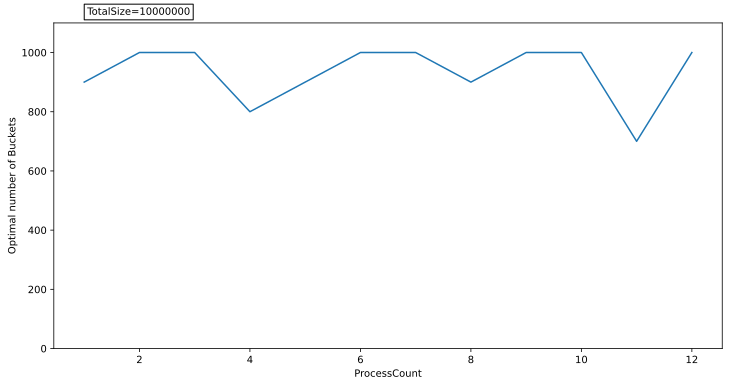

In [164]:
slice_dict = {"TotalSize": 10000000}

def min_buckets(df, slice_dict, xcol, metric, xscale="linear", yscale="linear"):
    # Get df slice according to slice_dict keys and values
    config = ""
    for key in slice_dict: 
        df = df[df[key] == slice_dict[key]]
        config += f"{key}={slice_dict[key]}"
        
    # Get the values to plot
    y = []
    x = np.unique(df[xcol].to_numpy())
    for xs in x:
        new_df = df[df[xcol] == xs]
        y.append(df.loc[new_df[metric].idxmin()]["NumBuckets"])
    y = np.array(y)
    
    # Plot data
    fig, ax = plt.subplots(figsize=(12, 6))
    props = dict(boxstyle='square', facecolor='white')
    ax.text(0.05, 1.025, config, transform=ax.transAxes, fontsize=10, bbox=props)
    ax.plot(x, y)
    ax.set_ylim(0,1100)
    ax.set_xlabel(xcol)
    ax.set_ylabel("Number of Buckets")
    plt.show()
    
min_buckets(data, slice_dict, "ProcessCount", "TotalTime")

In [22]:
from matplotlib import gridspec

def plot(ax, x, y_mean, y_cf, label, linestyle="-", marker="o", color="blue"):
    # Plot the mean
    ax.plot(x, y_mean, label=label, linestyle=linestyle, color=color)
    # Fill between lower and upper confidence intervals
    ax.fill_between(x, y_mean - y_cf, y_mean + y_cf, alpha=0.2, color=color)
    
def plot_slice(df, slice_dict, xcol, ycol, title, conf_interval=1, xscale="linear", yscale="linear", save=False):
    # Get df slice according to slice_dict keys and values
    config = ""
    for key in slice_dict: 
        df = df[df[key] == slice_dict[key]]
        config += f"{key}={slice_dict[key]}\n"
    config += f"Confidence Interval=${conf_interval} \cdot \sigma$"
        
    # Get the values to plot
    x, y_means, y_stds = df[xcol], df[ycol], df[ycol + "_std"]
    y_ci = conf_interval * y_stds / np.sqrt(len(y_stds))
    
    if ycol == "ParallelFrac":
        x = np.delete(np.array(x), [0])
        y_means = np.delete(np.array(y_means), [0])
        y_ci = np.delete(np.array(y_ci), [0])
    
    # Plot data
    props = dict(boxstyle='square', facecolor='white')
    fig = plt.figure(figsize=(12,5))
    if "TotalTime" in ycol: 
        gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
        ax = plt.subplot(gs[0])
        if "cGain" in ycol:
            ax.plot(x,x,label="Ideal", linestyle="--")
            plot(ax, x, y_means, y_ci, label="Measured")
            ax.legend()
        else:
            plot(ax, x, y_means, y_ci, label="")
        ax1 = plt.subplot(gs[1], sharex=ax)
        total = df["TotalTime"]
        y_msg = df["MsgTime"] / total
        y_proc = df["ProcTime"] / total
        y_wait = df["WaitTime"] / total
        width = 2 / len(x)
        ax1.bar(x-width, y_proc, color='darkgreen', label="Proc", width=width)
        ax1.bar(x, y_msg, color='goldenrod', label="Msg", width=width)
        ax1.bar(x+width, y_wait, color='firebrick', label="Wait", width=width)
        ax1.set_ylabel("Time Contribution")
        ax1.set_yscale("linear")
        ax1.set_xscale(xscale)
        ax1.minorticks_on()
        ax1.grid(b=True, which="major", linestyle="-")
        ax1.grid(b=True, which="minor", linestyle="dotted")
        plt.subplots_adjust(hspace=.0)
        ax1.legend()
    else: 
        ax = plt.subplot()
        ax.set_xscale(xscale)
        ax.set_yscale(yscale)
        plot(ax, x, y_means, y_ci, "")
    ax.set_title(title)
    config += "\nSize per process: 1000000"
    ax.text(0.8075, 1.025, config, transform=ax.transAxes, fontsize=10, bbox=props)
    plt.xlabel(xcol)
    ax.set_ylabel(ycol)
    ax.minorticks_on()
    ax.grid(b=True, which="major", linestyle="-")
    ax.grid(b=True, which="minor", linestyle="dotted")
    if save: plt.savefig("Plots/" + title.replace(" ","") + ".png", dpi=300)
    plt.show()

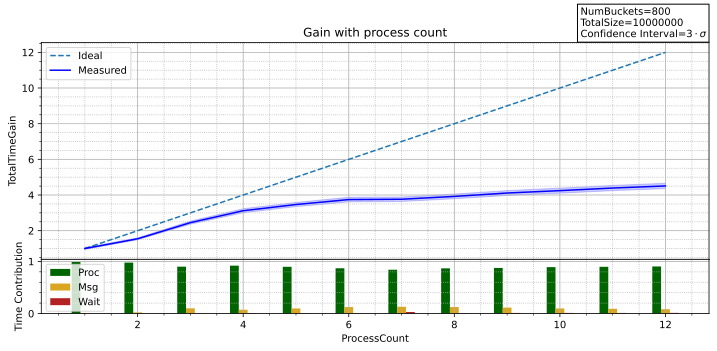

In [212]:
slice_dict = {"NumBuckets": 800, "TotalSize": 10000000}
plot_slice(data, slice_dict, "ProcessCount", "TotalTimeGain", "Gain with process count", 3, save=True, yscale="linear")

In [1]:
## Weak scaling analysis

In [70]:
weak = pd.read_csv("weak.csv")

# Program parameters and metrics
parameters = ["TotalSize", "NumBuckets", "ProcessCount"]
metrics = ["ProcTime", "MsgTime", "WaitTime", "TotalTime"]

# Get means and stds of all runs
weakMeans = weak.groupby(parameters).mean().reset_index()
weakStds = weak.groupby(parameters).std().reset_index()

# Add everything to one dataframe
for col in metrics:
    newcol = col + "_std"
    gaincol = col + "Efficiency"
    gainstdcol = gaincol + "_std"
    weakMeans[newcol] = weakStds[col]
    
    base = float(weakMeans[weakMeans["ProcessCount"] == 1][col])
    basestd = float(weakMeans[weakMeans["ProcessCount"] == 1][newcol])
    # weakMeans[gaincol] = weakMeans["ProcessCount"] * base / weakMeans[col]
    # weakMeans[gainstdcol] = weakMeans["ProcessCount"] * np.sqrt( (basestd / weakMeans[col])**2 + (base * weakMeans[newcol] / weakMeans[col])**2 )
    weakMeans[gaincol] = base / weakMeans[col]
    weakMeans[gainstdcol] = np.sqrt( (basestd / weakMeans[col])**2 + (base * weakMeans[newcol] / weakMeans[col])**2 )
   
weak = weakMeans

# Gather everything back
del weakMeans
del weakStds

In [71]:
weak

,TotalSize,NumBuckets,ProcessCount,ProcTime,MsgTime,WaitTime,TotalTime,ProcTime_std,ProcTimeEfficiency,ProcTimeEfficiency_std,MsgTime_std,MsgTimeEfficiency,MsgTimeEfficiency_std,WaitTime_std,WaitTimeEfficiency,WaitTimeEfficiency_std,TotalTime_std,TotalTimeEfficiency,TotalTimeEfficiency_std
0,1000000,800,1,0.087058,0.000877,0.000001,0.087936,0.003034,1.000000,0.034987,0.000021,1.000000,0.024436,1.414214e-07,1.000000,0.138648,0.003049,1.000000,0.034806
1,2000000,800,2,0.138482,0.003770,0.000007,0.142258,0.001452,0.628662,0.021931,0.000804,0.232531,0.005685,1.880187e-06,0.153153,0.021234,0.001418,0.618143,0.021450
2,3000000,800,3,0.114255,0.006303,0.000396,0.120953,0.002375,0.761967,0.026620,0.002272,0.139084,0.003413,4.258273e-04,0.002579,0.000358,0.004108,0.727024,0.025384
3,4000000,800,4,0.130561,0.009252,0.000848,0.140661,0.003125,0.666801,0.023335,0.003592,0.094754,0.002340,1.047555e-03,0.001202,0.000167,0.006167,0.625161,0.022016
4,5000000,800,5,0.148556,0.015091,0.002403,0.166051,0.004464,0.586029,0.020593,0.004371,0.058091,0.001442,1.904988e-03,0.000424,0.000059,0.007549,0.529573,0.018791
5,6000000,800,6,0.165282,0.017344,0.002200,0.184826,0.004662,0.526725,0.018523,0.004938,0.050546,0.001260,1.886003e-03,0.000464,0.000064,0.007966,0.475778,0.016926
6,7000000,800,7,0.193369,0.028099,0.006478,0.227946,0.003526,0.450218,0.015773,0.004784,0.031199,0.000777,3.457160e-03,0.000157,0.000022,0.002928,0.385776,0.013423
7,8000000,800,8,0.216573,0.025710,0.004927,0.247210,0.003365,0.401980,0.014076,0.003551,0.034099,0.000842,1.515806e-03,0.000207,0.000029,0.002857,0.355713,0.012375
8,9000000,800,9,0.239686,0.022828,0.005885,0.268398,0.003470,0.363218,0.012723,0.005479,0.038403,0.000962,3.399390e-03,0.000173,0.000024,0.006618,0.327632,0.011565
9,10000000,800,10,0.261240,0.024289,0.003262,0.288791,0.002465,0.333250,0.011644,0.003237,0.036093,0.000890,4.183278e-04,0.000313,0.000043,0.003902,0.304497,0.010624


In [88]:
def plot_slice(df, slice_dict, xcol, ycol, title, conf_interval=1, xscale="linear", yscale="linear", save=False):
    # Get df slice according to slice_dict keys and values
    config = ""
    for key in slice_dict: 
        df = df[df[key] == slice_dict[key]]
        config += f"{key}={slice_dict[key]}\n"
    config += f"Confidence Interval=${conf_interval} \cdot \sigma$"
    
    df1 = df[df["ProcessCount"] == 1]
    df2 = df[df["ProcessCount"] == 12]
        
    # Get the values to plot
    x1, y1_means, y1_stds = df1[xcol], df1[ycol], df1[ycol + "_std"]
    y1_ci = conf_interval * y1_stds / np.sqrt(len(y1_stds))
    x2, y2_means, y2_stds = df2[xcol], df2[ycol], df2[ycol + "_std"]
    y2_ci = conf_interval * y2_stds / np.sqrt(len(y2_stds))
    
    if ycol == "ParallelFrac":
        x = np.delete(np.array(x), [0])
        y_means = np.delete(np.array(y_means), [0])
        y_ci = np.delete(np.array(y_ci), [0])
    
    # Plot data
    props = dict(boxstyle='square', facecolor='white')
    fig = plt.figure(figsize=(12,5))
    if "cTotalTime" in ycol: 
        gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
        ax = plt.subplot(gs[0])
        if "cGain" in ycol:
            ax.plot(x,x,label="Ideal", linestyle="--")
            plot(ax, x, y_means, y_ci, label="Measured")
            ax.legend()
        else:
            p = np.polyfit(x, y_means, 1)
            plot(ax, x, y_means, y_ci, label="Measured")
            # ax.plot(x, p[0]*x+p[1], label="Gustavson's Law")
            # print(p)
            ax.legend()
        ax1 = plt.subplot(gs[1], sharex=ax)
        total = df["TotalTime"]
        y_msg = df["MsgTime"] / total
        y_proc = df["ProcTime"] / total
        y_wait = df["WaitTime"] / total
        width = 2 / len(x)
        ax1.bar(x-width, y_proc, color='darkgreen', label="Proc", width=width)
        ax1.bar(x, y_msg, color='goldenrod', label="Msg", width=width)
        ax1.bar(x+width, y_wait, color='firebrick', label="Wait", width=width)
        ax1.set_ylabel("Time\nContribution")
        ax1.set_yscale("linear")
        ax1.set_xscale(xscale)
        ax1.minorticks_on()
        ax1.grid(b=True, which="major", linestyle="-")
        ax1.grid(b=True, which="minor", linestyle="dotted")
        plt.subplots_adjust(hspace=.0)
        ax1.legend()
    else: 
        ax = plt.subplot()
        ax.set_xscale(xscale)
        ax.set_yscale(yscale)
        plot(ax, x1, y1_means, y1_ci, "1 Process")
        plot(ax, x2, y2_means, y2_ci, "12 Processes", color="darkgreen")
        ax.legend()
    ax.set_title(title)
    ax.text(0.797, 1.025, config, transform=ax.transAxes, fontsize=10, bbox=props)
    plt.xlabel(xcol)
    ax.set_ylabel(ycol)
    ax.minorticks_on()
    ax.grid(b=True, which="major", linestyle="-")
    ax.grid(b=True, which="minor", linestyle="dotted")
    if save: plt.savefig("Plots/" + title.replace(" ","") + ".png", dpi=300)
    plt.show()

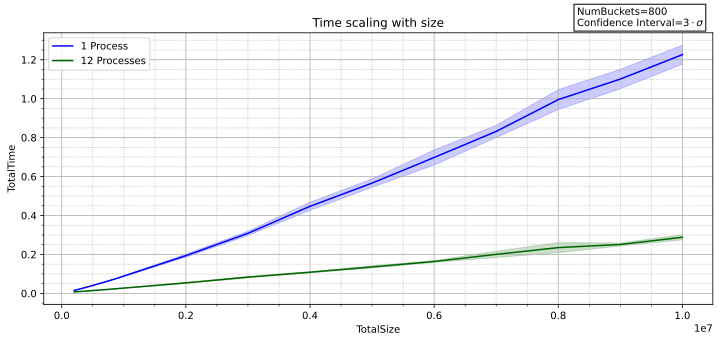

In [89]:
slice_dict = {"NumBuckets": 800}
plot_slice(data, slice_dict, "TotalSize", "TotalTime", "Time scaling with size", 3, save=True, yscale="linear")

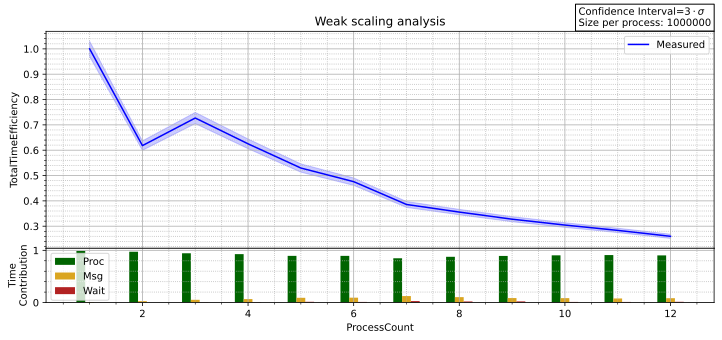

In [73]:
slice_dict = {}
plot_slice(weak, slice_dict, "ProcessCount", "TotalTimeEfficiency", "Weak scaling analysis", 3, save=True, yscale="linear")